In [1]:
# Set up feedack system
# from learntools.core import binder
# binder.bind(globals())
# from learntools.sql.ex1 import *


# create a helper object for our bigquery dataset
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="Av-Clig-e345234ebf61.json"

import bq_helper
chicago_crime = bq_helper.BigQueryHelper(active_project= "bigquery-public-data", 
                                         dataset_name = "chicago_crime")
print("Setup Complete")

ModuleNotFoundError: No module named 'bq_helper'

In [2]:
chicago_crime.list_tables()
data = chicago_crime.query_to_pandas("select * from bigquery-public-data.chicago_crime.crime limit 50000")

/usr/local/lib/python3.6/dist-packages/google/cloud/bigquery/client.py:445: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  "Cannot create BigQuery Storage client, the dependency "


In [3]:
# data.count()

In [4]:
def toYear(x):
    return int(x.year)

data["year"] = data.date.apply(toYear)

In [5]:
def toYearMonth(x):
    return str(x.year) + "_" + str(x.month) 
# 
data["year_month"] = data.date.apply(toYearMonth)

In [6]:
def toMonth(x):
    return int(x.month)

data["month"] = data.date.apply(toMonth)

In [7]:
df_group = data.groupby("year_month").count()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


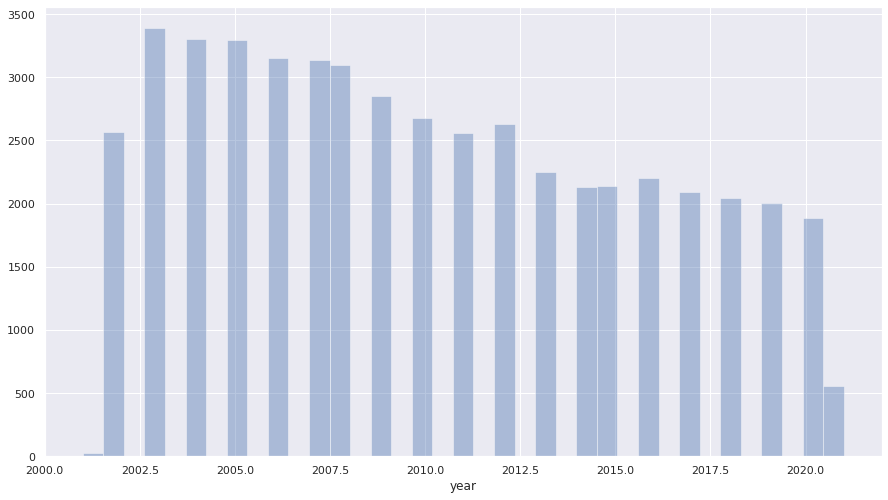

In [8]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8.27)})
# plt.xlim(2001, 2015)
sns.distplot(a=data["year"], hist=True, kde=False, rug=False )
plt.show()


In [9]:
df_group["year_month"] = df_group.index

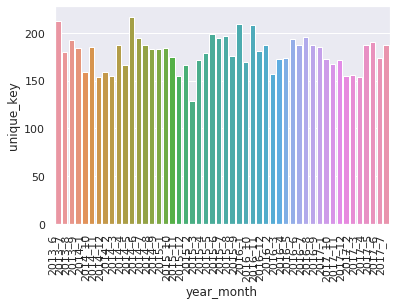

In [10]:
# Create bars
# ax= plt.bar(df_group["year_month"], df_group["unique_key"])
ax = sns.barplot(x ="year_month", y ='unique_key', data = df_group.iloc[150:200])
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')    
# Create names on the x-axis
# plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()

# df_group.head()
# df_group

In [11]:
data_moth = data.groupby("month").agg("count")

In [12]:
data_moth["month"] = data_moth.index

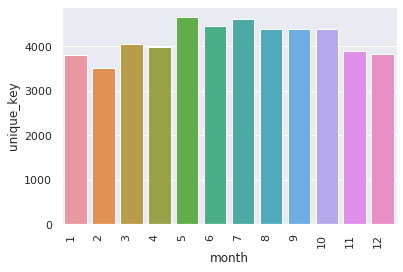

In [13]:
# Create bars
ax = sns.barplot(x ="month", y ='unique_key', data = data_moth)
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')    
# Create names on the x-axis
# plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()

# df_group.head()
# df_group

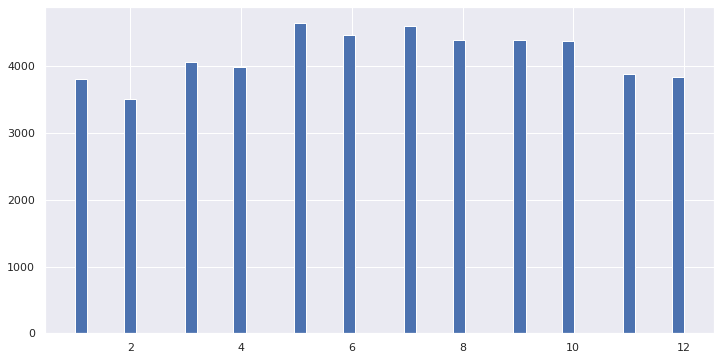

In [14]:
data.month.hist(bins=50, figsize=(12,6))

In [15]:
data.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,year_month,month
0,10206171,HY393166,2015-07-16 05:00:00+00:00,001XX W GARFIELD BLVD,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,CURRENCY EXCHANGE,False,False,...,11,1176228.0,1868523.0,2015,2018-02-10 15:50:01+00:00,41.794584,-87.629307,"(41.794583892, -87.629307346)",2015_7,7
1,10734342,HZ493764,2016-10-28 08:00:00+00:00,054XX S WENTWORTH AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,STREET,False,False,...,11,1175896.0,1868633.0,2016,2018-02-10 15:50:01+00:00,41.794893,-87.630521,"(41.794893197, -87.630521478)",2016_10,10
2,11132989,JA490282,2017-10-29 03:35:00+00:00,089XX S DAUPHIN AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,02,1183790.0,1845723.0,2017,2018-02-10 15:50:01+00:00,41.731845,-87.602288,"(41.731845173, -87.602288494)",2017_10,10
3,11026580,JA357604,2017-07-21 16:00:00+00:00,031XX W FOSTER AVE,0557,ASSAULT,AGG PRO.EMP:KNIFE/CUTTING INST,CTA BUS,True,False,...,04A,1154621.0,1934381.0,2017,2018-02-10 15:50:01+00:00,41.975763,-87.706777,"(41.975763041, -87.706776899)",2017_7,7
4,11644976,JC211465,2019-03-15 12:30:00+00:00,047XX S WENTWORTH AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,False,True,...,04B,1175752.0,1873657.0,2019,2019-04-08 16:11:13+00:00,41.808683,-87.630899,"(41.808682769, -87.630898966)",2019_3,3


In [16]:
import pandas as pd
frequencia = pd.crosstab(data.primary_type, data.month)

In [17]:
frequencia.T

primary_type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
month,,,,,,,,,,,,,,,,,,,,,
1,10,336,1487,38,0,40,161,3,93,366,...,198,11,0,57,1,294,52,6,124,48
2,10,365,1456,30,3,37,148,4,93,299,...,191,10,0,68,0,223,47,11,94,41
3,18,422,1793,32,4,30,165,5,105,316,...,171,5,0,57,0,280,49,8,89,55
4,18,414,1659,34,0,32,166,4,105,284,...,175,7,0,67,0,293,47,6,122,46
5,19,519,2105,41,0,38,180,1,126,285,...,181,4,1,98,0,307,65,12,111,39
6,17,451,2002,45,1,39,170,2,128,308,...,186,7,0,86,0,329,46,5,103,41
7,27,466,2077,45,1,38,169,5,129,294,...,196,3,0,65,0,357,53,6,125,46
8,20,446,1882,39,0,55,195,2,156,277,...,186,9,0,56,0,299,50,8,125,46
9,29,493,1846,41,0,37,163,6,124,273,...,187,9,2,73,0,350,46,6,128,40


In [18]:
frequencia.T.describe().T["mean"] / frequencia.T.describe().T["std"]

primary_type
ARSON                                 3.327715
ASSAULT                               7.165943
BATTERY                               7.916156
BURGLARY                              5.267971
CONCEALED CARRY LICENSE VIOLATION     0.623232
CRIM SEXUAL ASSAULT                   4.219742
CRIMINAL DAMAGE                      12.261415
CRIMINAL SEXUAL ASSAULT               2.225973
CRIMINAL TRESPASS                     5.501101
DECEPTIVE PRACTICE                    8.894688
GAMBLING                              2.001893
HOMICIDE                              4.261401
HUMAN TRAFFICKING                     0.552771
INTERFERENCE WITH PUBLIC OFFICER      4.703524
INTIMIDATION                          2.196328
KIDNAPPING                            4.508500
LIQUOR LAW VIOLATION                  3.419274
MOTOR VEHICLE THEFT                   6.157648
NARCOTICS                             9.316172
NON-CRIMINAL                          0.552771
OBSCENITY                             1.446640


In [19]:
import seaborn as sns

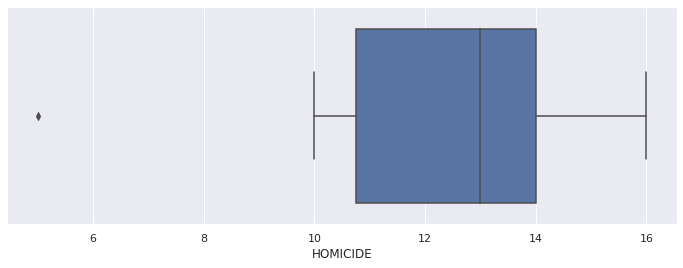

In [20]:
# data.head()

# ax = sns.boxplot(x="arested", y="rp", data=df.query("Renda < 20000"), orient="h")
ax = sns.boxplot(x=frequencia.T["HOMICIDE"])
ax.figure.set_size_inches(12,4)
# ax.set_title("X", fontsize=18)
# ax.set_xlabel("Valor", fontsize=14)

In [21]:
data.district.unique()

array([ 2,  6, 17,  5,  1,  8,  9,  4, 16, 10, 31, 22, 24, 20, 25])

In [22]:
data.head().T

frequencia2 = pd.crosstab(data.district, data.arrest)

In [23]:
frequencia2

arrest,False,True
district,,
1,26,17
2,1603,575
4,10116,3232
5,5276,1923
6,37,9
8,5217,1965
9,4850,2072
10,0,1
16,4742,1477


In [24]:
# print(data.columns)
# data.T.iloc[:, 0:10]

In [25]:
# data.head()
tipos = data.primary_type.str.get_dummies()
# data.primary_type.unique()
tipos

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
type(tipos)

pandas.core.frame.DataFrame

In [27]:
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(5)

scaler = StandardScaler()

tipos_escalados = scaler.fit_transform(tipos)
tipos_escalados

array([[-0.0666305 , -0.33625163, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658],
       [-0.0666305 , -0.33625163, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658],
       [-0.0666305 , -0.33625163, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658],
       ...,
       [-0.0666305 ,  2.97396328, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658],
       [-0.0666305 ,  2.97396328, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658],
       [-0.0666305 ,  2.97396328, -0.85955106, ..., -0.04174965,
        -0.16765586, -0.10458658]])

In [34]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(tipos_escalados)
model.labels_.min()

0

In [39]:
data.T.iloc[:, 0:3]

,0,1,2
unique_key,10206171,10734342,11132989
case_number,HY393166,HZ493764,JA490282
date,2015-07-16 05:00:00+00:00,2016-10-28 08:00:00+00:00,2017-10-29 03:35:00+00:00
block,001XX W GARFIELD BLVD,054XX S WENTWORTH AVE,089XX S DAUPHIN AVE
iucr,1152,1154,0281
primary_type,DECEPTIVE PRACTICE,DECEPTIVE PRACTICE,CRIM SEXUAL ASSAULT
description,ILLEGAL USE CASH CARD,FINANCIAL IDENTITY THEFT $300 AND UNDER,NON-AGGRAVATED
location_description,CURRENCY EXCHANGE,STREET,RESIDENCE
arrest,False,False,False
domestic,False,False,False


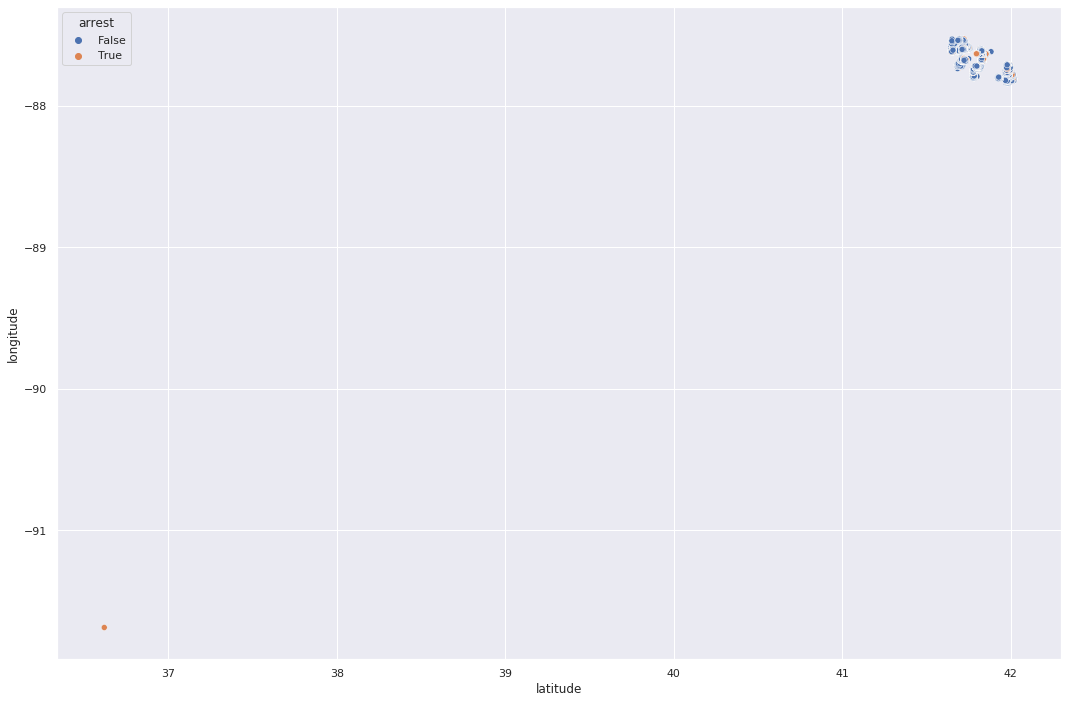

In [48]:
ax = sns.scatterplot(x="latitude", y="longitude", hue="arrest", data=data)
ax.figure.set_size_inches(18,12)

In [61]:
data.query("latitude < 37")

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,year_month,month
6091,9015161,HW162837,2013-02-19 15:45:00+00:00,130XX S LANGLEY AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,08B,0.0,0.0,2013,2016-02-04 06:33:39+00:00,36.619446,-91.686566,"(36.619446395, -91.686565684)",2013_2,2
17269,8220301,HT453893,2011-08-18 12:10:00+00:00,072XX W KENNEDY EXPY OB,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,CTA TRAIN,True,False,...,14,0.0,0.0,2011,2016-02-04 06:33:39+00:00,36.619446,-91.686566,"(36.619446395, -91.686565684)",2011_8,8


In [62]:
data1 = data.drop([17269, 6091])

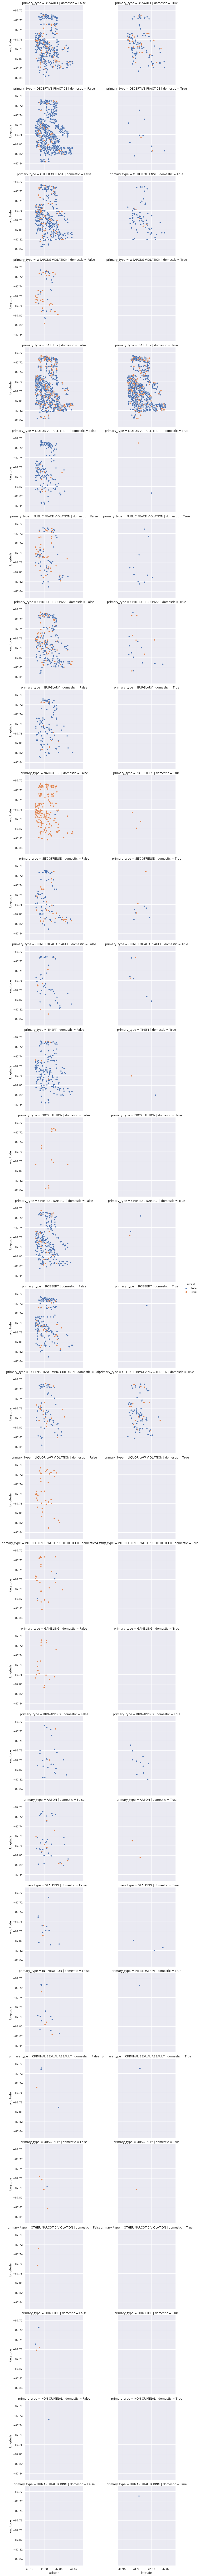

In [97]:
ax = sns.relplot(x="latitude", y="longitude", hue="arrest", col="domestic", row="primary_type", data=data1.query("latitude > 41.95"))

# ax.figure.set_size_inches(18,12)
# data1.year.unique()

In [98]:
data.location_description.unique()

array(['CURRENCY EXCHANGE', 'STREET', 'RESIDENCE', 'CTA BUS',
       'POLICE FACILITY/VEH PARKING LOT', 'APARTMENT', 'RESTAURANT',
       'BANK', 'DEPARTMENT STORE',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'SIDEWALK',
       'VEHICLE NON-COMMERCIAL', 'OTHER',
       'OTHER RAILROAD PROP / TRAIN DEPOT', 'DRUG STORE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'BRIDGE', 'CTA TRAIN',
       'JAIL / LOCK-UP FACILITY', 'POLICE FACILITY / VEHICLE PARKING LOT',
       'PARK PROPERTY', 'PARKING LOT', 'SCHOOL, PUBLIC, BUILDING',
       'HOTEL/MOTEL', 'HIGHWAY/EXPRESSWAY',
       'ATM (AUTOMATIC TELLER MACHINE)', 'SCHOOL, PUBLIC, GROUNDS',
       'VEHICLE-COMMERCIAL', 'DRIVEWAY - RESIDENTIAL',
       'CTA GARAGE / OTHER PROPERTY', 'HOSPITAL BUILDING/GROUNDS',
       'GOVERNMENT BUILDING/PROPERTY', 'RESIDENCE-GARAGE',
       'FACTORY/MANUFACTURING BUILDING', 'COLLEGE/UNIVERSITY GROUNDS',
       'ALLEY', 'SMALL RETAIL STORE', 'CHA APARTMENT',
       'SCHOOL, PRIVATE, BUILDING', 'AUTO', 'BAR